In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file = "D:/DATA SKRIPSI/Kontrak-Sewa-Chelsie-250422.xlsx"
df = pd.read_excel(file)

In [ ]:
file_path = "D:/DATA SKRIPSI/kontrak_sewa_bersih.xlsx"  

m_df = pd.read_excel(file_path, sheet_name="Monthly_Fixed")
d_df = pd.read_excel(file_path, sheet_name="Daily_Fixed")

In [12]:
df.iloc[:, 10:20].head

<bound method NDFrame.head of       LeaseYearEnd  LeaseMonthEnd  LeaseDayEnd  LeaseDurationDays  \
0             2025              7           18                 90   
1             2025              5           31                 45   
2             2025              4           30                 20   
3             2025              4            8                114   
4             2025              4            8                120   
...            ...            ...          ...                ...   
3909          2016             12           10                 29   
3910          2016             10           10                 29   
3911          2016              7           10                 29   
3912          2016              5           10                 29   
3913          2020              9            9               1826   

      LeaseDurationMonths  n_subunit  BuildingArea_fix  \
0                       3          1             25.41   
1                       1

In [4]:
print(df.describe(include=[np.number]))

       BusinessType  BuildingArea  CuryUnitPrice  LeaseYearStart  \
count   3914.000000   3914.000000   3.914000e+03     3914.000000   
mean      67.577925    223.367361   3.171130e+06     2018.807103   
std       45.201581   1503.066668   6.859866e+06        3.006908   
min        1.000000      1.000000   1.875000e+00     2015.000000   
25%        3.000000      1.000000   1.375000e+05     2016.000000   
50%       99.000000     16.000000   3.168000e+05     2018.000000   
75%       99.000000     71.020000   4.500000e+06     2022.000000   
max       99.000000  19469.250000   1.250000e+08     2025.000000   

       LeaseMonthStart  LeaseDayStart  LeaseYearEnd  LeaseMonthEnd  \
count      3914.000000    3914.000000   3914.000000    3914.000000   
mean          6.454267      12.041901   2020.384262       6.384773   
std           3.641987       9.500738      3.112429       3.540808   
min           1.000000       1.000000   2015.000000       1.000000   
25%           3.000000       1.000000

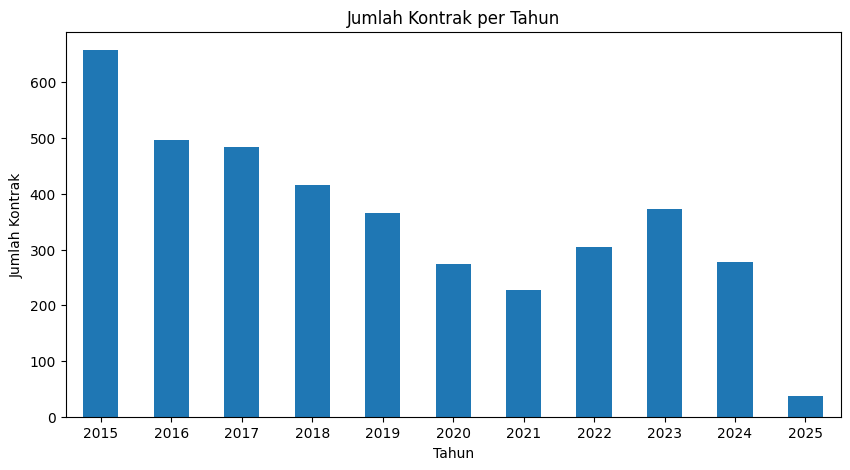

In [8]:
plt.figure(figsize=(10,5))

ax = df["LeaseYearStart"].value_counts().sort_index().plot(kind="bar")

plt.title("Jumlah Kontrak per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kontrak")

plt.xticks(rotation=0)
plt.show()


=== Perbandingan Statistik Harga (CuryUnitPrice_fix) ===
       Monthly_Fixed   Daily_Fixed
count   3.913000e+03  2.773000e+03
mean    2.439632e+05  8.633175e+06
std     2.532092e+05  1.174379e+07
min     9.000000e+03  2.142858e+04
25%     6.750000e+04  1.612903e+06
50%     1.750000e+05  3.214286e+06
75%     3.000000e+05  1.250000e+07
max     2.444444e+06  1.147500e+08


C:\Users\HP\AppData\Local\Temp\ipykernel_25296\1485593703.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([monthly_prices], labels=["Monthly_Fixed"])


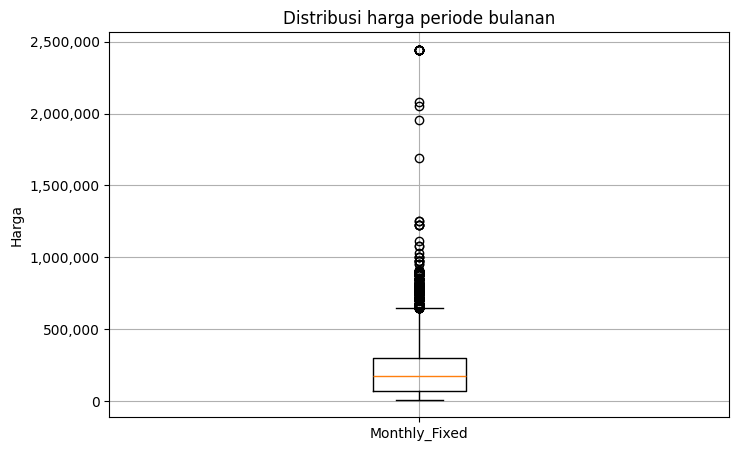

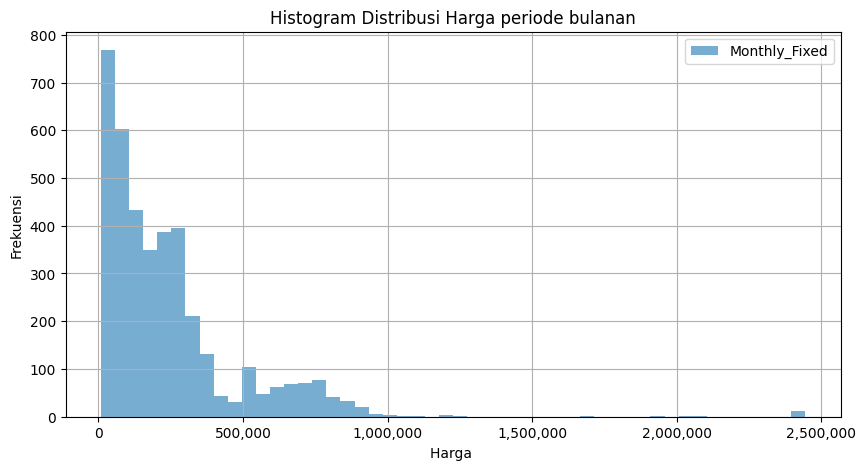

In [ ]:
import matplotlib.ticker as ticker
monthly_prices = m_df["CuryUnitPrice_fix"].dropna()
daily_prices = d_df["CuryUnitPrice_fix"].dropna()

# Hitung statistik deskriptif 
monthly_stats = monthly_prices.describe()
daily_stats = daily_prices.describe()

comparison_df = pd.DataFrame({
    "Monthly_Fixed": monthly_stats,
    "Daily_Fixed": daily_stats
})

# Tampilkan hasil statistik
print("=== Perbandingan Statistik Harga (CuryUnitPrice_fix) ===")
print(comparison_df)

# Buat visualisasi distribusi (Boxplot)
plt.figure(figsize=(8, 5))
plt.boxplot([monthly_prices], labels=["Monthly_Fixed"])
plt.title("Distribusi harga periode bulanan")
plt.ylabel("Harga")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

# histogram untuk melihat bentuk distribusi
plt.figure(figsize=(10, 5))
plt.hist(monthly_prices, bins=50, alpha=0.6, label="Monthly_Fixed")
plt.title("Histogram Distribusi Harga periode bulanan")
plt.xlabel("Harga ")
plt.ylabel("Frekuensi")
plt.legend()
plt.grid(True)


plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_25296\987455725.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([daily_prices], labels=["Daily price"])


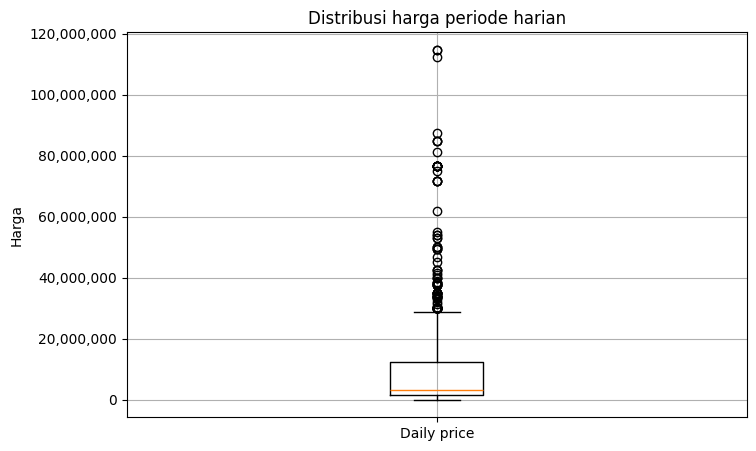

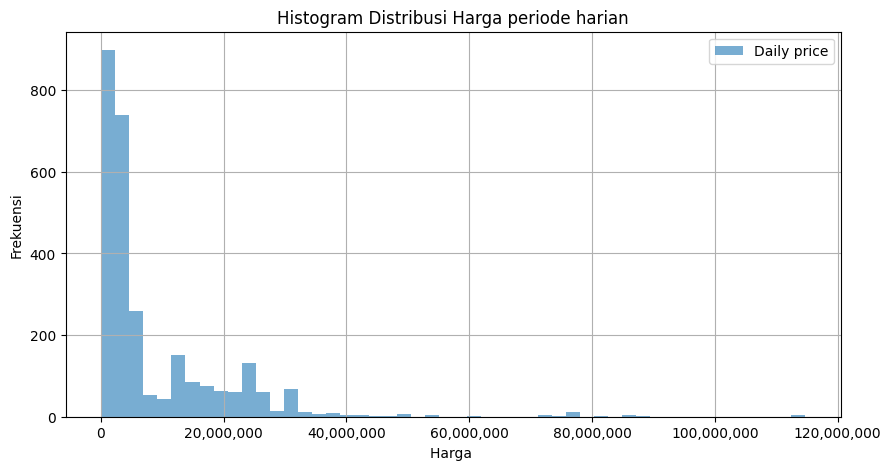

In [ ]:
# visualisasi distribusi (Boxplot)
plt.figure(figsize=(8, 5))
plt.boxplot([daily_prices], labels=["Daily price"])
plt.title("Distribusi harga periode harian")
plt.ylabel("Harga")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

# histogram bentuk distribusi
plt.figure(figsize=(10, 5))
plt.hist(daily_prices, bins=50, alpha=0.6, label="Daily price")
plt.title("Histogram Distribusi Harga periode harian")
plt.xlabel("Harga ")
plt.ylabel("Frekuensi")
plt.legend()
plt.grid(True)

import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

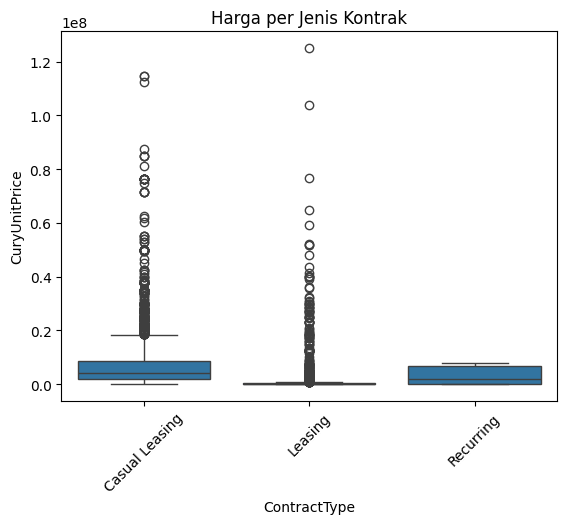

In [ ]:
# Harga per Tipe Kontrak 
plt.figure()
sns.boxplot(x="ContractType", y="CuryUnitPrice", data=df)
plt.title("Harga per Jenis Kontrak")
plt.xticks(rotation=45)
plt.show()

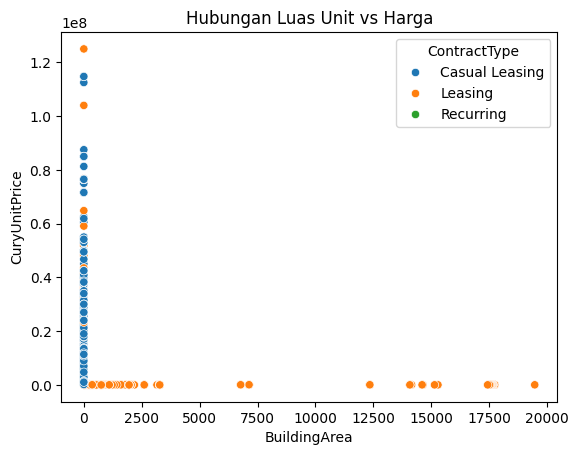

In [ ]:
# luas vs harga
plt.figure()
sns.scatterplot(x="BuildingArea", y="CuryUnitPrice", hue="ContractType", data=df)
plt.title("Hubungan Luas Unit vs Harga")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23508\3324854020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ContractType", data=df, palette="Set2")


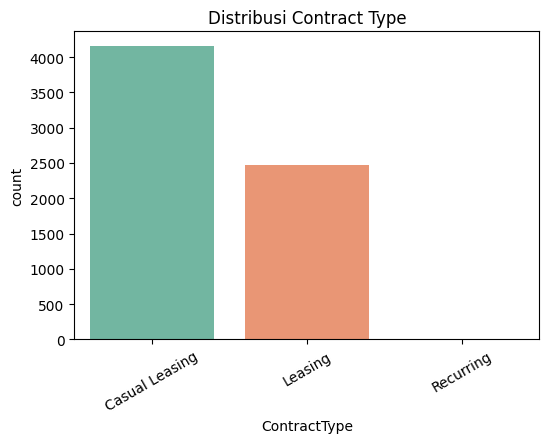

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="ContractType", data=df, palette="Set2")
plt.title("Distribusi Contract Type")
plt.xticks(rotation=30)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23508\1749762382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ContractPeriod", data=df, palette="Set3")


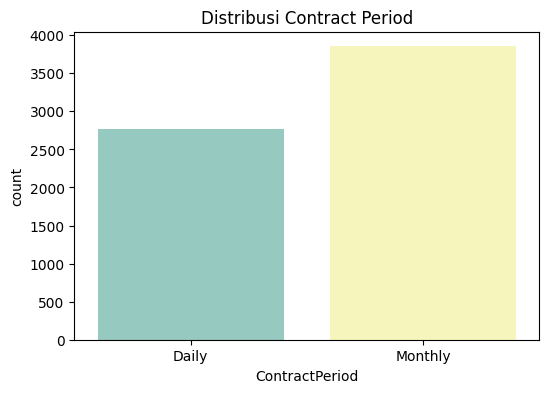

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="ContractPeriod", data=df, palette="Set3")
plt.title("Distribusi Contract Period")
plt.show()

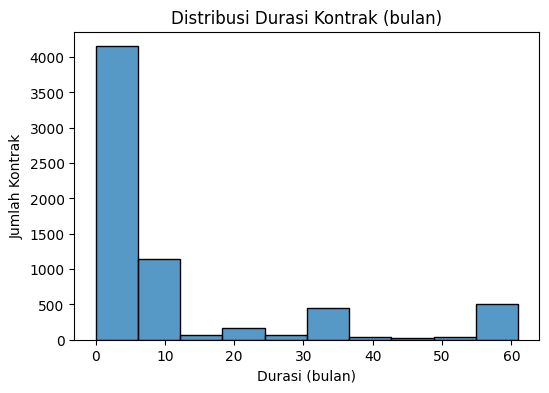

In [ ]:
# Histogram durasi kontrak
plt.figure(figsize=(6,4))
sns.histplot(df["LeaseDurationMonths"], bins=10, kde=False)
plt.title("Distribusi Durasi Kontrak (bulan)")
plt.xlabel("Durasi (bulan)")
plt.ylabel("Jumlah Kontrak")
plt.show()

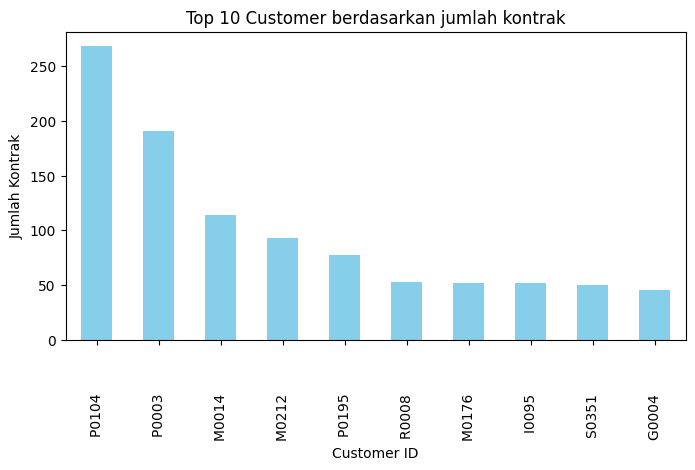

In [ ]:
# Kontrak per Customer (Top 10)
plt.figure(figsize=(8,4))
df["CustID"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Customer berdasarkan jumlah kontrak")
plt.xlabel("Customer ID")
plt.ylabel("Jumlah Kontrak")
plt.show()

In [9]:
# encode categorical column (one hot)
df_encoded = pd.get_dummies(df, columns=["ContractType", "ContractPeriod", "TranCodeID"])

print("\nSetelah One Hot Encoding:")
df_encoded.iloc[:, 9:]
#print(df_encoded)


Setelah One Hot Encoding:


,UnitID,LeaseYearStart,LeaseMonthStart,LeaseDayStart,LeaseYearEnd,LeaseMonthEnd,LeaseDayEnd,LeaseDurationDays,LeaseDurationMonths,ContractType_Casual Leasing,ContractType_Leasing,ContractType_Recurring,ContractPeriod_Daily,ContractPeriod_Monthly,TranCodeID_LAC,TranCodeID_LBH,TranCodeID_LCC,TranCodeID_LSA,TranCodeID_LSC,TranCodeID_LSN
0,0PEP0101000001,2025,5,12,2025,6,1,20,1,True,False,False,True,False,False,False,False,True,False,False
1,0PEATRLG000051,2025,5,19,2025,5,25,6,0,True,False,False,True,False,True,False,False,False,False,False
2,0PEATRLG000051,2025,5,5,2025,5,18,13,0,True,False,False,True,False,True,False,False,False,False,False
3,0PC0CV06000051,2025,5,16,2025,5,18,2,0,True,False,False,True,False,False,False,True,False,False,False
4,0PCATRLG000006,2025,5,16,2025,5,25,9,0,True,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,0PCP01LG000068,2017,6,12,2017,6,18,6,0,True,False,False,True,False,False,False,False,True,False,False
6626,0PE000UG000019,2016,1,5,2017,1,4,365,12,False,True,False,False,True,False,False,False,False,False,True
6627,0PE000UG000019,2015,1,5,2016,1,4,364,12,False,True,False,False,True,False,False,False,False,False,True
6628,0PE000UG000020,2016,1,5,2017,1,4,365,12,False,True,False,False,True,False,False,False,False,False,True


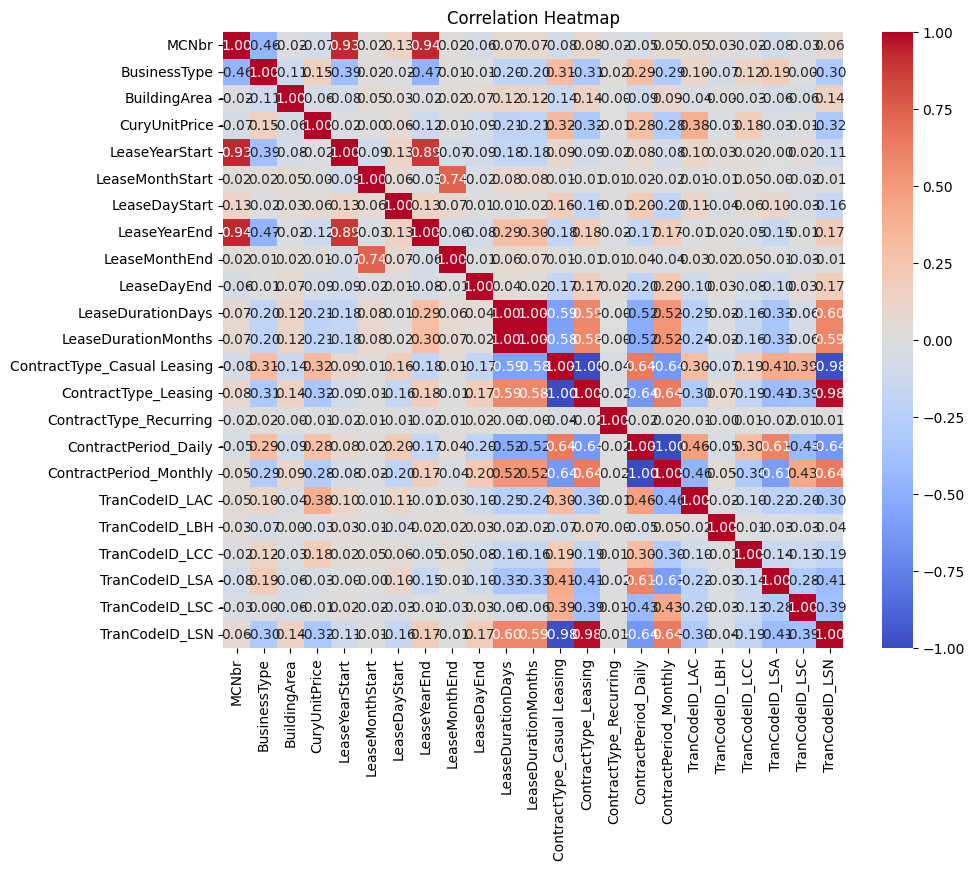

In [ ]:


corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_25296\3288752254.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\HP\AppData\Local\Temp\ipykernel_25296\3288752254.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\HP\AppData\Local\Temp\ipykernel_25296\3288752254.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\HP\AppData\Local\Temp\ipykernel_25296\3288752254.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\HP\AppData\Local\Temp\ipykernel_25296\3288752254.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\HP\AppData\Local\Temp\ipykernel_25296\3288752254.py:16: RuntimeWarning: invalid value encountere


=== Matriks Korelasi (Cramér’s V) ===
                ContractType  ContractPeriod  BusinessType  TranCode
ContractType        1.000000             NaN      0.162445  0.701052
ContractPeriod           NaN             NaN           NaN       NaN
BusinessType        0.162445             NaN      1.000000  0.133311
TranCode            0.701052             NaN      0.133311  1.000000


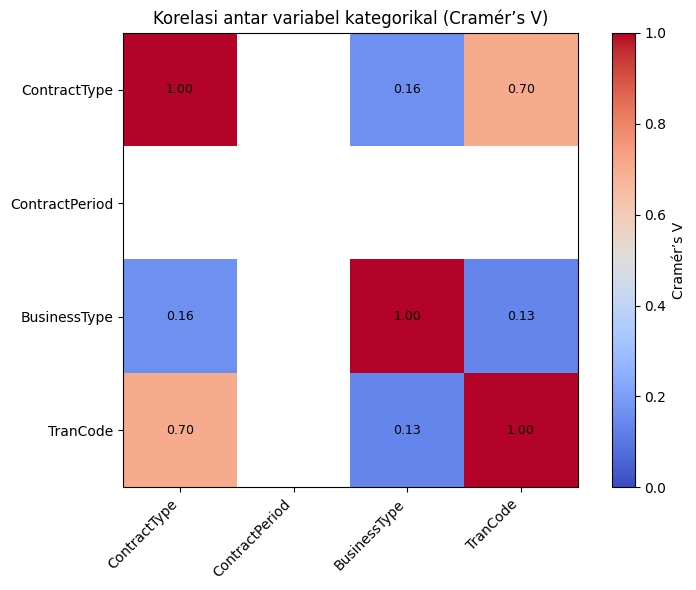

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Baca data dari file (misalnya Excel atau CSV)
df = pd.read_excel("D:/DATA SKRIPSI/kontrak_sewa_bersih.xlsx") 

# Pilih kolom kategori
cat_cols = ['ContractType', 'ContractPeriod', 'BusinessType', 'TranCode']

# Buat matriks Cramér’s V
corr_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

corr_matrix = corr_matrix.astype(float)

print("\n=== Matriks Korelasi (Cramér’s V) ===")
print(corr_matrix)


plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar(label="Cramér’s V")

# Tambahkan label sumbu
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), corr_matrix.index)

# Tambahkan nilai di setiap sel
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        value = corr_matrix.iloc[i, j]
        if not np.isnan(value):
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black', fontsize=9)

plt.title("Korelasi antar variabel kategorikal (Cramér’s V)")
plt.tight_layout()
plt.show()

## analisa korelasi 

Contoh data sewa (5 baris teratas):
   RowID    ContractType ContractPeriod  BusinessType TranCode  BuildingArea  \
0      1         Leasing        Monthly            99      LSN         25.41   
1      2         Leasing        Monthly             3      LSN        113.05   
2      3         Leasing        Monthly             2      LSN         32.95   
3      4         Leasing        Monthly            99      LSN        100.00   
4      5  Casual Leasing        Monthly            99      LSC        100.00   

   CuryUnitPrice  LeaseYearStart  LeaseMonthStart  LeaseDayStart  ...  \
0  150000.000000            2025                4             19  ...   
1  110570.544007            2025                4             16  ...   
2  411875.000000            2025                4             10  ...   
3   20000.000000            2024               12             15  ...   
4   45000.000000            2024               12              9  ...   

   LeaseMonthEnd  LeaseDayEnd  LeaseDuration

C:\Users\HP\AppData\Local\Temp\ipykernel_26616\2010271970.py:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg_price)


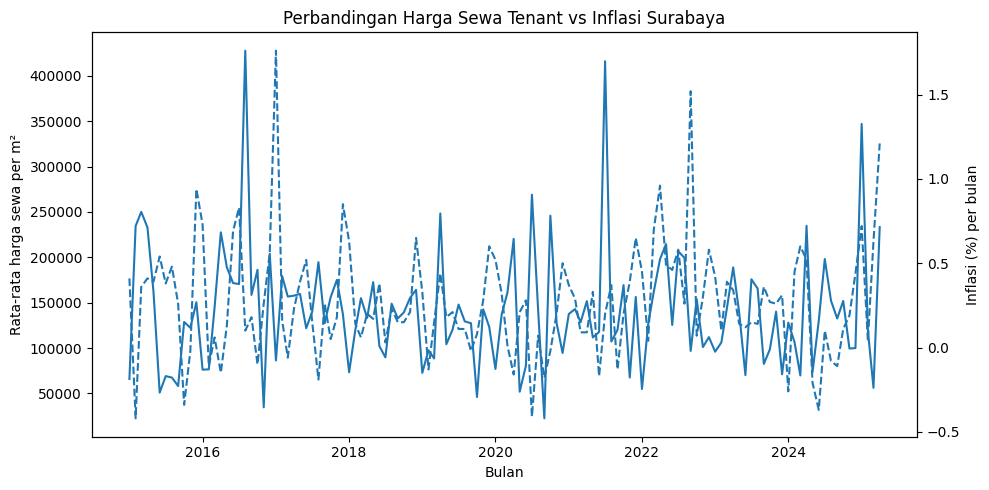

Korelasi Inflasi vs Harga Sewa (level):
  Pearson r = -0.066 | p-value = 0.4639

Korelasi Inflasi vs Perubahan Harga Sewa (dlog_rent):
  Inflasi(t)   vs Δlog(sewa)(t):   r = -0.129 | p-value = 0.1558
  Inflasi(t-1) vs Δlog(sewa)(t):   r = 0.056 | p-value = 0.5348

ADF Test untuk log_rent (level)
  ADF Statistic : -8.645
  p-value       : 0.0
  Critical Value (1%) : -3.4851
  Critical Value (5%) : -2.8855
  Critical Value (10%) : -2.5796

ADF Test untuk Δlog_rent (difference)
  ADF Statistic : -5.9076
  p-value       : 0.0
  Critical Value (1%) : -3.4901
  Critical Value (5%) : -2.8877
  Critical Value (10%) : -2.5807

ADF Test untuk Inflasi (level)
  ADF Statistic : -8.5889
  p-value       : 0.0
  Critical Value (1%) : -3.4847
  Critical Value (5%) : -2.8853
  Critical Value (10%) : -2.5795

=== REGRESI 1: log_rent ~ Inflasi ===
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.005
M

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

plt.rcParams['figure.figsize'] = (10, 5)



path_sewa = r"D:/DATA SKRIPSI/kontrak_sewa_bersih.xlsx"
path_inflasi = r"D:/DATA SKRIPSI/Laju Inflasi Di Kota Surabaya Tahun 2006-2020.csv"


df_sewa_raw = pd.read_excel(path_sewa)

print("Contoh data sewa (5 baris teratas):")
print(df_sewa_raw.head(), "\n")

#  Baca data inflasi Surabaya
df_infl_raw = pd.read_csv(
    path_inflasi,
    sep=';',         
    engine='python', 
    header=1          
)

print("Contoh data inflasi mentah (5 baris teratas):")
print(df_infl_raw.head(), "\n")

# BENTUK DERET WAKTU SEWA BULANAN

df_sewa = df_sewa_raw.copy()


df_sewa["start_date"] = pd.to_datetime(dict(
    year=df_sewa["LeaseYearStart"],
    month=df_sewa["LeaseMonthStart"],
    day=df_sewa["LeaseDayStart"]
))

df_sewa["month"] = df_sewa["start_date"].dt.to_period("M").dt.to_timestamp()

def weighted_avg_price(g):
    return np.average(g["CuryUnitPrice"], weights=g["BuildingArea"])

df_rent_monthly = (
    df_sewa
    .groupby("month")
    .apply(weighted_avg_price)
    .to_frame(name="avg_unit_price")
    .reset_index()
)

# Tambahkan log harga sewa (untuk analisis perubahan)
df_rent_monthly["log_rent"] = np.log(df_rent_monthly["avg_unit_price"])

print("Deret waktu sewa bulanan:")
print(df_rent_monthly.head(), "\n")

# BENTUK DERET WAKTU INFLASI BULANAN

df_infl = df_infl_raw.copy()

bulan_map = {
    "Januari": 1, "Februari": 2, "Maret": 3, "April": 4,
    "Mei": 5, "Juni": 6, "Juli": 7, "Agustus": 8,
    "September": 9, "Oktober": 10, "November": 11, "Desember": 12
}

df_infl = df_infl[df_infl["Bulan"].isin(bulan_map.keys())].copy()

df_infl_long = df_infl.melt(
    id_vars=["Bulan"],       
    var_name="Tahun",
    value_name="Inflasi"
)

df_infl_long["Inflasi"] = (
    df_infl_long["Inflasi"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.strip()
)
df_infl_long["Inflasi"] = pd.to_numeric(df_infl_long["Inflasi"], errors="coerce")

# Map bulan & tahun ke datetime
df_infl_long["month_num"] = df_infl_long["Bulan"].map(bulan_map)
df_infl_long["year_num"] = df_infl_long["Tahun"].astype(int)

df_infl_long["month"] = pd.to_datetime(dict(
    year=df_infl_long["year_num"],
    month=df_infl_long["month_num"],
    day=1
))

# Ambil hanya kolom yang diperlukan
df_infl_monthly = df_infl_long[["month", "Inflasi"]].sort_values("month")

print("Deret waktu inflasi bulanan (setelah reshape):")
print(df_infl_monthly.head(), "\n")

# Gabung data internal dengan inflasi

df = pd.merge(
    df_rent_monthly,
    df_infl_monthly,
    on="month",
    how="inner"   
)

df = df.sort_values("month").reset_index(drop=True)

print("Data gabungan sewa + inflasi:")
print(df.head())
print("\nPeriode data gabungan:", df["month"].min(), "s/d", df["month"].max(), "\n")

# Visualisasi dasar

fig, ax1 = plt.subplots()
ax1.plot(df["month"], df["avg_unit_price"])
ax1.set_ylabel("Rata-rata harga sewa per m²")
ax1.set_xlabel("Bulan")

ax2 = ax1.twinx()
ax2.plot(df["month"], df["Inflasi"], linestyle="--")
ax2.set_ylabel("Inflasi (%) per bulan")

plt.title("Perbandingan Harga Sewa Tenant vs Inflasi Surabaya")
plt.tight_layout()
plt.show()

# Korelasi

# Korelasi inflasi dengan level harga sewa
corr_lvl, p_lvl = pearsonr(df["Inflasi"].dropna(), df["avg_unit_price"].dropna())
print("Korelasi Inflasi vs Harga Sewa (level):")
print("  Pearson r =", round(corr_lvl, 3), "| p-value =", round(p_lvl, 4))

# Hitung perubahan log sewa (~% perubahan per bulan)
df["dlog_rent"] = df["log_rent"].diff() * 100
df["Inflasi_lag1"] = df["Inflasi"].shift(1)

df_corr = df.dropna(subset=["dlog_rent", "Inflasi", "Inflasi_lag1"])

# Korelasi inflasi vs perubahan harga sewa
corr_chg, p_chg = pearsonr(df_corr["Inflasi"], df_corr["dlog_rent"])
corr_chg_lag1, p_chg_lag1 = pearsonr(df_corr["Inflasi_lag1"], df_corr["dlog_rent"])

print("\nKorelasi Inflasi vs Perubahan Harga Sewa (dlog_rent):")
print("  Inflasi(t)   vs Δlog(sewa)(t):   r =", round(corr_chg, 3), "| p-value =", round(p_chg, 4))
print("  Inflasi(t-1) vs Δlog(sewa)(t):   r =", round(corr_chg_lag1, 3), "| p-value =", round(p_chg_lag1, 4))

# Uji stasioneritas

def adf_test(series, name=""):
    series = series.dropna()
    result = adfuller(series)
    print(f"\nADF Test untuk {name}")
    print("  ADF Statistic :", round(result[0], 4))
    print("  p-value       :", round(result[1], 4))
    for key, value in result[4].items():
        print(f"  Critical Value ({key}) : {round(value, 4)}")

# Level log sewa
adf_test(df["log_rent"], "log_rent (level)")

# Perubahan log sewa
adf_test(df["dlog_rent"], "Δlog_rent (difference)")

# Inflasi
adf_test(df["Inflasi"], "Inflasi (level)")

# regresi pengaruh inflasi terhadap sewa

# --- 8.1 Regresi log_rent terhadap inflasi (level) ---
df_reg1 = df.dropna(subset=["log_rent", "Inflasi"]).copy()
X1 = sm.add_constant(df_reg1["Inflasi"])  # tambah intercept
y1 = df_reg1["log_rent"]

model1 = sm.OLS(y1, X1).fit()
print("\n=== REGRESI 1: log_rent ~ Inflasi ===")
print(model1.summary())

# --- 8.2 Regresi Δlog_rent terhadap inflasi (perubahan sewa) ---
df_reg2 = df.dropna(subset=["dlog_rent", "Inflasi"]).copy()
X2 = sm.add_constant(df_reg2["Inflasi"])
y2 = df_reg2["dlog_rent"]

model2 = sm.OLS(y2, X2).fit()
print("\n=== REGRESI 2: Δlog_rent ~ Inflasi ===")
print(model2.summary())

# --- 8.3 Regresi Δlog_rent terhadap inflasi lag 1 ---
df_reg3 = df.dropna(subset=["dlog_rent", "Inflasi_lag1"]).copy()
X3 = sm.add_constant(df_reg3["Inflasi_lag1"])
y3 = df_reg3["dlog_rent"]

model3 = sm.OLS(y3, X3).fit()
print("\n=== REGRESI 3: Δlog_rent ~ Inflasi_lag1 ===")
print(model3.summary())

# ============================================================
# 9. UJI GRANGER CAUSALITY
#    Apakah inflasi "memprediksi" sewa?
# ============================================================

# Siapkan data tanpa NaN
df_gc = df[["log_rent", "Inflasi"]].dropna().copy()

# Granger test: apakah Inflasi menyebabkan log_rent?
maxlag = 3  # bisa kamu ganti misal 6
print(f"\n=== UJI GRANGER: Inflasi -> log_rent (maxlag={maxlag}) ===")
granger_result = grangercausalitytests(df_gc[["log_rent", "Inflasi"]], maxlag=maxlag, verbose=True)

# Catatan:
#   H0: Inflasi tidak menyebabkan log_rent (tidak ada Granger causality)
#   Jika p-value (misal di F-test) < 0.05 -> tolak H0 -> ada bukti Granger causality


Contoh data Daily_Fixed:
     ContractType ContractPeriod  BusinessType TranCode  BuildingArea  \
0  Casual Leasing          Daily            99      LSC             1   
1  Casual Leasing          Daily            99      LSC             1   
2  Casual Leasing          Daily            99      LAC             1   
3  Casual Leasing          Daily            99      LAC             1   
4  Casual Leasing          Daily            99      LAC             1   

   CuryUnitPrice  LeaseYearStart  LeaseMonthStart  LeaseDayStart  \
0      21428.575            2016                3             28   
1      26785.715            2016                2             29   
2      68181.820            2022               10             13   
3      68181.820            2022               10             13   
4      68181.820            2022               10             13   

   LeaseYearEnd  LeaseMonthEnd  LeaseDayEnd  LeaseDurationDays  \
0          2016              5            1                 3

C:\Users\HP\AppData\Local\Temp\ipykernel_26616\175846951.py:53: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg_price)


Deret waktu sewa harian (setelah agregasi):
        date  avg_unit_price   log_rent  year  month_num
0 2015-01-05    25834.507042  10.159466  2015          1
1 2015-01-07    11875.000000   9.382191  2015          1
2 2015-01-12    18886.363636   9.846195  2015          1
3 2015-01-19    29610.576923  10.295887  2015          1
4 2015-01-26    29596.153846  10.295400  2015          1 

Inflasi bulanan (key year, month_num):
   year  month_num  Inflasi
0  2015          1     0.41
1  2015          2    -0.42
2  2015          3     0.36
3  2015          4     0.41
4  2015          5     0.39 

Data gabungan sewa harian + inflasi:
        date  avg_unit_price   log_rent  year  month_num  Inflasi
0 2015-01-05    25834.507042  10.159466  2015          1     0.41
1 2015-01-07    11875.000000   9.382191  2015          1     0.41
2 2015-01-12    18886.363636   9.846195  2015          1     0.41
3 2015-01-19    29610.576923  10.295887  2015          1     0.41
4 2015-01-26    29596.153846  10.295

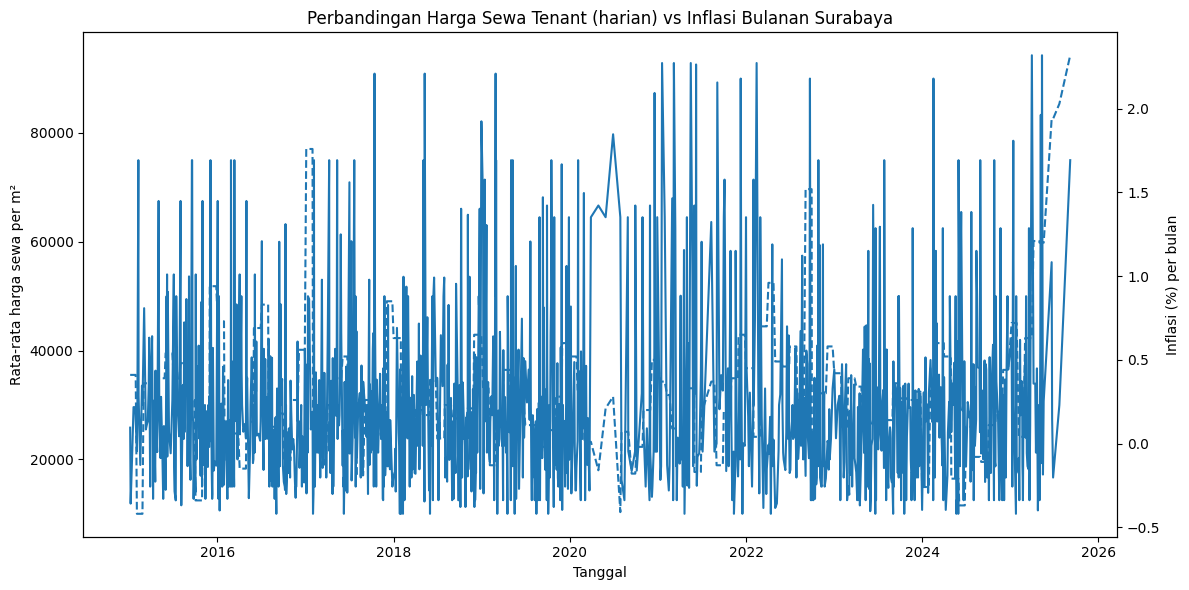

Korelasi Inflasi vs Harga Sewa Harian (level):
  Pearson r = 0.005 | p-value = 0.8598

Korelasi Inflasi vs Perubahan Harga Sewa Harian (dlog_rent):
  Inflasi(t)   vs Δlog(sewa)(t):   r = -0.0 | p-value = 0.9865
  Inflasi(t-1) vs Δlog(sewa)(t):   r = -0.007 | p-value = 0.8069

ADF Test untuk log_rent (level, daily)
  ADF Statistic : -36.3106
  p-value       : 0.0
  Critical Value (1%) : -3.4357
  Critical Value (5%) : -2.8639
  Critical Value (10%) : -2.568

ADF Test untuk Δlog_rent (difference, daily)
  ADF Statistic : -12.4996
  p-value       : 0.0
  Critical Value (1%) : -3.4358
  Critical Value (5%) : -2.8639
  Critical Value (10%) : -2.568

ADF Test untuk Inflasi (level, repeated daily)
  ADF Statistic : -5.5527
  p-value       : 0.0
  Critical Value (1%) : -3.4357
  Critical Value (5%) : -2.8639
  Critical Value (10%) : -2.568

=== REGRESI 1 (daily): log_rent ~ Inflasi ===
                            OLS Regression Results                            
Dep. Variable:               l

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

plt.rcParams['figure.figsize'] = (12, 6)

path_sewa = r"D:/DATA SKRIPSI/kontrak_sewa_bersih.xlsx"
path_inflasi = r"D:/DATA SKRIPSI/Laju Inflasi Di Kota Surabaya Tahun 2006-2020.csv"

# --- 1.1 Baca sheet Daily_Fixed (data kontrak per baris) ---
df_daily_raw = pd.read_excel(path_sewa, sheet_name="Daily_Fixed")

print("Contoh data Daily_Fixed:")
print(df_daily_raw.head(), "\n")
print("Kolom yang tersedia:", df_daily_raw.columns, "\n")

# ============================================================
# 2. BENTUK DERET WAKTU SEWA HARIAN
#    (rata-rata tertimbang per m² per HARI)
# ============================================================

df_daily = df_daily_raw.copy()

# Buat kolom 'date' dari LeaseYearStart, LeaseMonthStart, LeaseDayStart
df_daily["date"] = pd.to_datetime(dict(
    year=df_daily["LeaseYearStart"],
    month=df_daily["LeaseMonthStart"],
    day=df_daily["LeaseDayStart"]
))

# Fungsi rata-rata tertimbang harga sewa per m²
# ASUMSI:
#   - harga satuan sewa per m² ada di kolom 'CuryUnitPrice'
#   - luas unit ada di kolom 'BuildingArea'
# Jika beda, ganti nama kolom di bawah ini.  # <-- SESUAIKAN
def weighted_avg_price(g):
    return np.average(g["CuryUnitPrice"], weights=g["BuildingArea"])

df_rent_daily = (
    df_daily
    .groupby("date")
    .apply(weighted_avg_price)
    .to_frame(name="avg_unit_price")
    .reset_index()
)

# Tambahkan log harga sewa
df_rent_daily["log_rent"] = np.log(df_rent_daily["avg_unit_price"])

# Tambahkan tahun & bulan (untuk join dengan inflasi bulanan)
df_rent_daily["year"] = df_rent_daily["date"].dt.year
df_rent_daily["month_num"] = df_rent_daily["date"].dt.month

print("Deret waktu sewa harian (setelah agregasi):")
print(df_rent_daily.head(), "\n")

# ============================================================
# 3. BENTUK DERET WAKTU INFLASI BULANAN
# ============================================================

df_infl_raw = pd.read_csv(
    path_inflasi,
    sep=';',
    engine='python',
    header=1
)

bulan_map = {
    "Januari": 1, "Februari": 2, "Maret": 3, "April": 4,
    "Mei": 5, "Juni": 6, "Juli": 7, "Agustus": 8,
    "September": 9, "Oktober": 10, "November": 11, "Desember": 12
}

# Ambil hanya baris dengan nama bulan valid
df_infl = df_infl_raw[df_infl_raw["Bulan"].isin(bulan_map.keys())].copy()

# Wide -> long: kolom tahun jadi baris
df_infl_long = df_infl.melt(
    id_vars=["Bulan"],
    var_name="Tahun",
    value_name="Inflasi"
)

# Bersihkan nilai inflasi (koma -> titik, buang spasi)
df_infl_long["Inflasi"] = (
    df_infl_long["Inflasi"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.strip()
)
df_infl_long["Inflasi"] = pd.to_numeric(df_infl_long["Inflasi"], errors="coerce")

# Tambah kolom tahun & bulan numerik
df_infl_long["month_num"] = df_infl_long["Bulan"].map(bulan_map)
df_infl_long["year"] = df_infl_long["Tahun"].astype(int)

# Kita hanya perlu key (year, month_num, Inflasi)
df_infl_month = (
    df_infl_long[["year", "month_num", "Inflasi"]]
    .dropna()
    .drop_duplicates()
    .sort_values(["year", "month_num"])
)

print("Inflasi bulanan (key year, month_num):")
print(df_infl_month.head(), "\n")

# sewa harian + inflasi
df = pd.merge(
    df_rent_daily,
    df_infl_month,
    on=["year", "month_num"],
    how="inner"  
)

df = df.sort_values("date").reset_index(drop=True)

print("Data gabungan sewa harian + inflasi:")
print(df.head())
print("\nPeriode data gabungan:", df["date"].min(), "s/d", df["date"].max(), "\n")

# visualisasi dasar

fig, ax1 = plt.subplots()
ax1.plot(df["date"], df["avg_unit_price"], label="Harga sewa harian")
ax1.set_ylabel("Rata-rata harga sewa per m²")
ax1.set_xlabel("Tanggal")

ax2 = ax1.twinx()
ax2.plot(df["date"], df["Inflasi"], linestyle="--", label="Inflasi bulanan")
ax2.set_ylabel("Inflasi (%) per bulan")

plt.title("Perbandingan Harga Sewa Tenant (harian) vs Inflasi Bulanan Surabaya")
plt.tight_layout()
plt.show()

# Korelasi sederhana (harian)

corr_lvl, p_lvl = pearsonr(df["Inflasi"].dropna(), df["avg_unit_price"].dropna())
print("Korelasi Inflasi vs Harga Sewa Harian (level):")
print("  Pearson r =", round(corr_lvl, 3), "| p-value =", round(p_lvl, 4))

# Perubahan log harga sewa (mendekati % perubahan harian)
df["dlog_rent"] = df["log_rent"].diff() * 100
df["Inflasi_lag1"] = df["Inflasi"].shift(1)

df_corr = df.dropna(subset=["dlog_rent", "Inflasi", "Inflasi_lag1"])

corr_chg, p_chg = pearsonr(df_corr["Inflasi"], df_corr["dlog_rent"])
corr_chg_lag1, p_chg_lag1 = pearsonr(df_corr["Inflasi_lag1"], df_corr["dlog_rent"])

print("\nKorelasi Inflasi vs Perubahan Harga Sewa Harian (dlog_rent):")
print("  Inflasi(t)   vs Δlog(sewa)(t):   r =", round(corr_chg, 3), "| p-value =", round(p_chg, 4))
print("  Inflasi(t-1) vs Δlog(sewa)(t):   r =", round(corr_chg_lag1, 3), "| p-value =", round(p_chg_lag1, 4))

# Uji stasioneritas - harian

def adf_test(series, name=""):
    series = series.dropna()
    result = adfuller(series)
    print(f"\nADF Test untuk {name}")
    print("  ADF Statistic :", round(result[0], 4))
    print("  p-value       :", round(result[1], 4))
    for key, value in result[4].items():
        print(f"  Critical Value ({key}) : {round(value, 4)}")

adf_test(df["log_rent"], "log_rent (level, daily)")
adf_test(df["dlog_rent"], "Δlog_rent (difference, daily)")
adf_test(df["Inflasi"], "Inflasi (level, repeated daily)")

# Regresi OLS - harian

df_reg1 = df.dropna(subset=["log_rent", "Inflasi"]).copy()
X1 = sm.add_constant(df_reg1["Inflasi"])
y1 = df_reg1["log_rent"]

model1 = sm.OLS(y1, X1).fit()
print("\n=== REGRESI 1 (daily): log_rent ~ Inflasi ===")
print(model1.summary())

df_reg2 = df.dropna(subset=["dlog_rent", "Inflasi"]).copy()
X2 = sm.add_constant(df_reg2["Inflasi"])
y2 = df_reg2["dlog_rent"]

model2 = sm.OLS(y2, X2).fit()
print("\n=== REGRESI 2 (daily): Δlog_rent ~ Inflasi ===")
print(model2.summary())

df_reg3 = df.dropna(subset=["dlog_rent", "Inflasi_lag1"]).copy()
X3 = sm.add_constant(df_reg3["Inflasi_lag1"])
y3 = df_reg3["dlog_rent"]

model3 = sm.OLS(y3, X3).fit()
print("\n=== REGRESI 3 (daily): Δlog_rent ~ Inflasi_lag1 ===")
print(model3.summary())

# granger causality

df_gc = df[["log_rent", "Inflasi"]].dropna().copy()

maxlag = 5  
print(f"\n=== UJI GRANGER (daily): Inflasi -> log_rent (maxlag={maxlag}) ===")
granger_result = grangercausalitytests(df_gc[["log_rent", "Inflasi"]], maxlag=maxlag, verbose=True)

